In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x, y = make_classification(n_samples=1000,     # Number of samples
                           n_features=10,      # Number of features (independent variables)
                           n_classes=2,        # Number of output classes (binary classification)
                           n_informative=3,    # Number of informative features
                           n_redundant=2,      # Number of redundant features (linear combinations)
                           random_state=42)    # Seed for reproducibility

In [4]:
x.shape, y.shape

((1000, 10), (1000,))

# Linear Combination

$$\pi = \beta_0 + \beta_1x_1+\ldots+\beta_kx_k$$

โดย
- $\beta_0$ คือ intercept
- Coefficients สำหรับแต่ละ features $x_i$ ถูกแสดงโดย $\beta_i$.



In [5]:
# 1. สุ่มสร้าง beta_i เริ่มต้น
beta_i = np.random.rand(10)

In [6]:
# 2. สุ่มสร้าง beta_0 เริ่มต้น
beta_0 = np.random.rand(1)

In [7]:
# 3. สร้างตัวแปร pi ตามตัวอย่างด้านบน
pi = beta_0 + np.dot(x, beta_i)
pi

array([-1.27663472e+00,  1.13738320e+00,  2.69747917e-01,  4.15932507e-01,
        2.87688487e+00,  6.42140986e-01,  1.42442262e+00,  2.07369137e+00,
        1.43423205e+00,  1.29994338e+00,  6.73180798e-01,  3.74151812e+00,
        1.61215115e+00,  2.05157244e+00,  9.31161209e-01,  1.77890916e-01,
        2.78111034e+00,  2.83700137e+00,  1.41589536e+00,  6.42591231e-01,
        1.82229469e-01,  1.57481433e+00,  1.98335910e+00,  1.29144912e+00,
        4.23325152e+00,  2.74973295e+00,  1.54094738e+00,  1.06696682e+00,
        1.41697513e+00,  2.22781974e+00, -1.30001133e+00,  3.42691426e+00,
       -8.39226578e-01,  2.85577167e+00,  2.79282208e+00,  1.57786754e+00,
       -5.24310180e-01,  2.66191067e+00,  9.17641434e-01,  2.16467701e+00,
        1.16919712e+00,  3.81206789e+00, -5.38321439e-01,  3.45467890e+00,
        1.85320786e+00,  1.70607863e+00,  1.64159292e+00,  7.60295156e-01,
        4.41003686e-01,  3.58729278e+00,  3.76122751e+00,  1.44321773e+00,
        1.66886599e+00,  

# Sigmoid function
$$Sigmoid(k) = \frac{1}{1+e^{k}}$$

ถ้าเราใส่ $\pi$ เข้าไปยังฟังก์ชั่น Sigmoid จะได้ค่าความน่าจะเป็นออกมา

$$probability = Sigmoid(\pi) = \frac{1}{1+e^{\pi}}$$

In [8]:
# ตัวอย่างโค้ดสำหรับ Sigmoid function

sigmoid = lambda k: 1 / (1+np.exp(-k))

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\winai\AppData\Local\Temp\ipykernel_65392\403679300.py:3: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\pi$', fontsize=28)


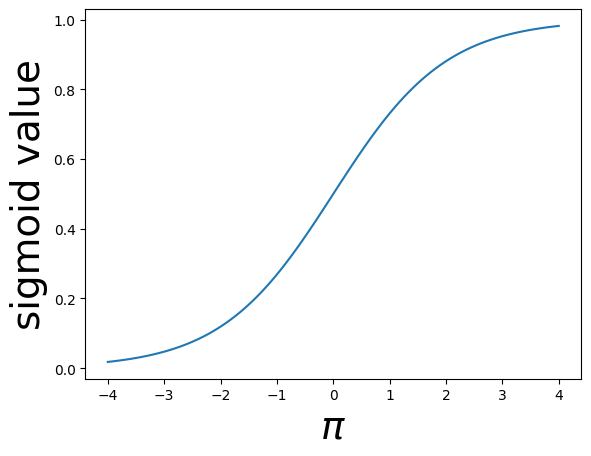

In [9]:
pi = np.linspace(-4, 4, 100)
plt.plot(pi, sigmoid(pi))
plt.xlabel('$\pi$', fontsize=28)
plt.ylabel("sigmoid value", fontsize=28)
plt.savefig("sigmoid.png");

In [10]:
# ทดลอง นำค่า pi ส่งเข้าไปยัง Sigmoid function
np.min(sigmoid(pi))

np.float64(0.01798620996209156)

In [11]:
np.max(sigmoid(pi))

np.float64(0.9820137900379085)

# Cost Function: Cross-Entropy

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$$

where:
- $ J(\theta) $ คือ cost function,
- $ m $ คือ จำนวน training examples,
- $ y^{(i)} $ คือ label ของ training example ที่ $ i $th ,
- $ h_\theta(x^{(i)}) $ คือ probability ที่ถูกทำนาย จาก  example ที่ $ i $th
- $ x^{(i)} $ คือ feature vector ที่ $ i $th ของ training example.

# Gradient Decent

New Parameter = Old Parameter − Learning Rate × Gradient

$$\theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \nabla J(\theta)$$

- $ \theta_{\text{new}} $ คือ parameter values ที่ได้รับการอัพเดทให้ดีขึ้นจาก parameter values ก่อนหน้า
- $ \theta_{\text{old}} $ คือ parameter values ก่อนหน้า
- $ \alpha $ (alpha) คือ learning rate,
- $ \nabla J(\theta) $ คือ **gradient** ของ **cost function** ซึ่งสอดคล้องกับ parameters $ \theta $.

---

$$\beta_{new} = \beta_{old} - \alpha\times [x^\top\cdot(\hat y - y)] / m$$

$$b_{new} = b_{old} - \alpha\times (\hat y - y) / m$$

In [13]:
# Training loop
learning_rate = 0.1
num_epochs = 1000
num_samples = y.shape[0]

for epoch in range(num_epochs):
    pi = np.dot(x, beta_i) + beta_0
    y_pred = sigmoid(pi)

    # Compute gradients
    dBeta = np.dot(x.T, (y_pred - y)) / num_samples
    db = np.sum(y_pred - y) / num_samples

    # Update weights and bias
    beta_i = beta_i - learning_rate * dBeta
    beta_0 = beta_0 - learning_rate * db